In [34]:
# sckit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, recall_score, precision_score


# Librosa
import librosa
import librosa.display

import IPython
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [35]:
data = pd.read_csv('Data/features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [36]:
# treating any missing values
list(data.columns[data.isnull().any()]) # list is empty meaning there are no null values.

[]

In [81]:
# label encoding for models
encode = preprocessing.LabelEncoder()
data['label'] = encode.fit_transform(data['label'])

# independant and dependant variables with normalisation 
x = data.drop(['label', 'filename'], axis = 1)
y = data['label']
x = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(x), columns = x.columns)

# splitting data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

C:\Users\Jenai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jenai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0     0.5820    0.6836    0.6288       275
           1     0.8907    0.9052    0.8979       306
           2     0.6007    0.5578    0.5785       294
           3     0.6880    0.5596    0.6172       327
           4     0.7287    0.5714    0.6406       315
           5     0.7303    0.7789    0.7538       285
           6     0.7500    0.8447    0.7945       309
           7     0.7130    0.8173    0.7616       301
           8     0.5409    0.6466    0.5890       266
           9     0.5534    0.4545    0.4991       319

    accuracy                         0.6800      2997
   macro avg     0.6778    0.6820    0.6761      2997
weighted avg     0.6802    0.6800    0.6763      2997



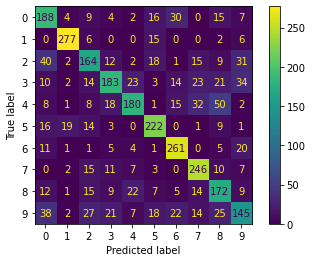

              precision    recall  f1-score   support

           0     0.8317    0.9164    0.8720       275
           1     0.9180    0.9510    0.9342       306
           2     0.7841    0.8027    0.7933       294
           3     0.8660    0.8502    0.8580       327
           4     0.9239    0.8095    0.8629       315
           5     0.8567    0.8807    0.8685       285
           6     0.8974    0.9061    0.9018       309
           7     0.8742    0.8771    0.8756       301
           8     0.7653    0.8947    0.8250       266
           9     0.8889    0.7273    0.8000       319

    accuracy                         0.8599      2997
   macro avg     0.8606    0.8616    0.8591      2997
weighted avg     0.8629    0.8599    0.8594      2997



C:\Users\Jenai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


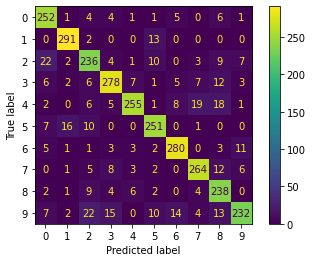

              precision    recall  f1-score   support

           0     0.6771    0.7855    0.7273       275
           1     0.9006    0.9477    0.9236       306
           2     0.7218    0.6531    0.6857       294
           3     0.6865    0.6697    0.6780       327
           4     0.7920    0.6286    0.7009       315
           5     0.7822    0.8316    0.8061       285
           6     0.8235    0.8608    0.8418       309
           7     0.8197    0.8306    0.8251       301
           8     0.6059    0.6992    0.6492       266
           9     0.6148    0.5455    0.5781       319

    accuracy                         0.7434      2997
   macro avg     0.7424    0.7452    0.7416      2997
weighted avg     0.7439    0.7434    0.7414      2997



C:\Users\Jenai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


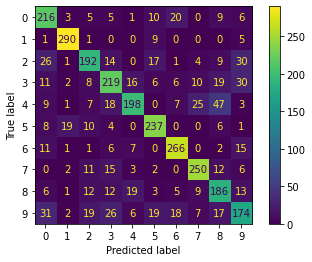

In [78]:
from sklearn import metrics
# function to build model
def buildModel(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(metrics.classification_report(y_test, prediction, digits=4))
    metrics.plot_confusion_matrix(model, X_test, y_test)
    plt.show()

# function to initialise model
def createModel(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
# logistic regression
buildModel(LogisticRegression())

# random forest classifier
buildModel(RandomForestClassifier())

# support vector machine
buildModel(SVC())

In [83]:
# random forest classifier parameter tuning

# changing 'max_leaf_nodes' parameter
for i in range (2, 52, 2):
    rf = RandomForestClassifier(max_leaf_nodes = i)
    rf.fit(X_train, y_train)
    prediction = rf.predict(X_test)
    print(f'Maximum leaf nodes: {i} Accuracy {accuracy_score(y_test, prediction)}')
 

# changing 'max_depth' parameter
for i in range (1, 35):
    rf = RandomForestClassifier(max_depth = i)
    rf.fit(X_train, y_train)
    prediction = rf.predict(X_test)
    print(f'Maximum depth: {i} Accuracy {accuracy_score(y_test, prediction)}')

Maximum leaf nodes: 2 Accuracy 0.34734734734734735
Maximum leaf nodes: 4 Accuracy 0.4057390724057391
Maximum leaf nodes: 6 Accuracy 0.47147147147147145
Maximum leaf nodes: 8 Accuracy 0.5045045045045045
Maximum leaf nodes: 10 Accuracy 0.5308641975308642
Maximum leaf nodes: 12 Accuracy 0.5568902235568902
Maximum leaf nodes: 14 Accuracy 0.5628962295628962
Maximum leaf nodes: 16 Accuracy 0.5769102435769102
Maximum leaf nodes: 18 Accuracy 0.594260927594261
Maximum leaf nodes: 20 Accuracy 0.5995995995995996
Maximum leaf nodes: 22 Accuracy 0.6119452786119453
Maximum leaf nodes: 24 Accuracy 0.6206206206206206
Maximum leaf nodes: 26 Accuracy 0.6262929596262929
Maximum leaf nodes: 28 Accuracy 0.6373039706373039
Maximum leaf nodes: 30 Accuracy 0.6446446446446447
Maximum leaf nodes: 32 Accuracy 0.648314981648315
Maximum leaf nodes: 34 Accuracy 0.6609943276609943
Maximum leaf nodes: 36 Accuracy 0.6666666666666666
Maximum leaf nodes: 38 Accuracy 0.6706706706706707
Maximum leaf nodes: 40 Accuracy 0.6

In [79]:
from sklearn.model_selection import GridSearchCV

# support vector machine parameter tuning
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

search = GridSearchCV(SVC(), parameters, refit = True, verbose= 2)
search.fit(X_train, y_train)
print(search.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   4.1s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   2.5s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   2.5s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   2.5s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   2.5s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.8s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   2.5s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   2.5s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   2.5s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.7s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.7s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.9s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.9s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.9s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.9s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.9s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ...................

C:\Users\Jenai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jenai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0     0.5820    0.6836    0.6288       275
           1     0.8907    0.9052    0.8979       306
           2     0.6007    0.5578    0.5785       294
           3     0.6880    0.5596    0.6172       327
           4     0.7287    0.5714    0.6406       315
           5     0.7303    0.7789    0.7538       285
           6     0.7500    0.8447    0.7945       309
           7     0.7130    0.8173    0.7616       301
           8     0.5409    0.6466    0.5890       266
           9     0.5534    0.4545    0.4991       319

    accuracy                         0.6800      2997
   macro avg     0.6778    0.6820    0.6761      2997
weighted avg     0.6802    0.6800    0.6763      2997



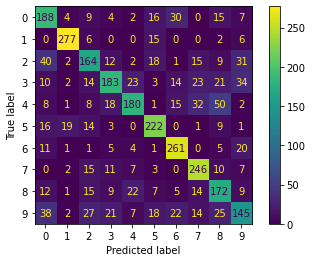

              precision    recall  f1-score   support

           0     0.8601    0.8945    0.8770       275
           1     0.9088    0.9444    0.9263       306
           2     0.7869    0.8163    0.8013       294
           3     0.8541    0.8593    0.8567       327
           4     0.9167    0.8381    0.8756       315
           5     0.8423    0.8807    0.8611       285
           6     0.8969    0.9288    0.9126       309
           7     0.8870    0.8605    0.8735       301
           8     0.7807    0.8835    0.8289       266
           9     0.8846    0.7210    0.7945       319

    accuracy                         0.8615      2997
   macro avg     0.8618    0.8627    0.8607      2997
weighted avg     0.8635    0.8615    0.8610      2997



C:\Users\Jenai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


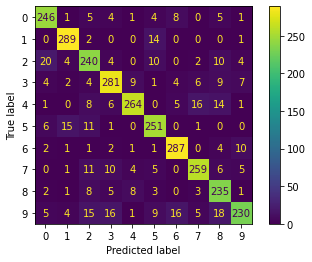

              precision    recall  f1-score   support

           0     0.8660    0.9636    0.9122       275
           1     0.9315    0.9771    0.9537       306
           2     0.8780    0.8810    0.8795       294
           3     0.8806    0.9021    0.8912       327
           4     0.9465    0.8984    0.9218       315
           5     0.9034    0.9193    0.9113       285
           6     0.9600    0.9320    0.9458       309
           7     0.9155    0.9003    0.9079       301
           8     0.8700    0.9060    0.8877       266
           9     0.8993    0.7837    0.8375       319

    accuracy                         0.9052      2997
   macro avg     0.9051    0.9064    0.9049      2997
weighted avg     0.9060    0.9052    0.9048      2997



C:\Users\Jenai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


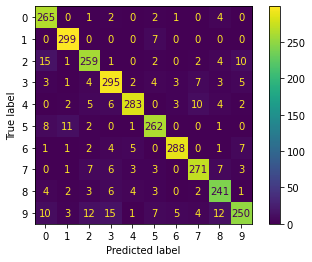

In [80]:
# final models 

buildModel(LogisticRegression()) # logistic regression

buildModel(RandomForestClassifier(max_depth = 25)) # random forest classifier

buildModel(SVC(C = 100, gamma = 1)) # support vector machine